In [353]:
import os
import h5py
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.colors as mcolors
import numpy as np
from iminuit import minuit
from iminuit.cost import LeastSquares

In [354]:
parent = r'C:/Users/ricca/QTLab2324/IRdetection/Instruments/Test_data/data_20_02_set1'

In [355]:
def reader(parent):

    data = {
        "res1" : [],
        "res2" : [],
        "res3" : [],
        "res4" : []
    }

    for folder in os.listdir(parent):
        if folder.startswith("T"):
            T = folder.replace('T_','')
            for file in os.listdir(parent + '/' + folder):
                dic = {
                    'F' : [],
                    'I' : [],
                    'Q' : [],
                    'S21' : []
                }
                with h5py.File(parent + '/' + folder + '/' + file, 'r') as f:
                    dic['F'] = np.array(f['raw_data']['f'][:])
                    dic['I'] = np.array(f['raw_data']['i'][:])
                    dic['Q'] = np.array(f['raw_data']['q'][:])
                    dic['S21'] = 20*np.log(np.sqrt(dic['I']**2 + dic['Q']**2))
                    dic['Phi'] = np.unwrap(np.arctan2(dic['I'],dic['Q']))
                    if '1' in file:
                        data['res1'].append([T, dic])
                    elif '2' in file:
                        data['res2'].append([T, dic])
                    elif '3' in file:
                        data['res3'].append([T, dic])
                    elif '4' in file:
                        data['res4'].append([T, dic])
    
    return data 

In [356]:
def resonance_model(x,a, Q, Qc,phi0):
    return -a*np.abs(1-Q/Qc*np.exp(1j*phi0)/(1+1j*((2*x*Q))))

def model(x, a0, a1, a2, Q, Qc,phi0):
    params = np.array([a0,a1,a2])
    pol = np.polyval(params, x)
    res = resonance_model(x, a0, Q,Qc,phi0)
    return res*pol

In [357]:
data = reader(parent)

In [358]:
F, T, S21, Phi, I, Q = [], [], [], [],[], []
F_2, T_2, S21_2, Phi_2 = [], [], [], []
F_3, T_3, S21_3, Phi_3 = [], [], [], []
F_4, T_4, S21_4, Phi_4 = [], [], [], []
for i,datas in enumerate(data['res1']):
    T.append(int(datas[0]))
    S21.append(datas[1]['S21'])
    I.append(datas[1]['I'])
    Q.append(datas[1]['Q'])
    Phi.append(datas[1]['Phi'])
    F.append(datas[1]['F'])
    
for i,datas in enumerate(data['res2']):
    T_2.append(int(datas[0]))
    S21_2.append(datas[1]['S21'])
    F_2.append(datas[1]['F'])
    Phi_2.append(datas[1]['Phi'])
    
for i,datas in enumerate(data['res3']):
    T_3.append(int(datas[0]))
    S21_3.append(datas[1]['S21'])
    F_3.append(datas[1]['F'])
    Phi_3.append(datas[1]['Phi'])
    
for i,datas in enumerate(data['res4']):
    T_4.append(int(datas[0]))
    S21_4.append(datas[1]['S21'])
    F_4.append(datas[1]['F'])
    Phi_4.append(datas[1]['Phi'])

In [359]:
sorted_indices = sorted(range(len(T)), key=lambda k: T[k])
sorted_T   = [T[i] for i in sorted_indices]
sorted_S21 = [S21[i] for i in sorted_indices]
sorted_Phi = [Phi[i] for i in sorted_indices]
sorted_F   = [F[i] for i in sorted_indices]
sorted_I   = [I[i] for i in sorted_indices]
sorted_Q   = [Q[i] for i in sorted_indices]

sorted_S21_2 = [S21_2[i] for i in sorted_indices]
sorted_F_2   = [F_2[i] for i in sorted_indices]
sorted_Phi_2 = [Phi_2[i] for i in sorted_indices]
sorted_I_2   = [I[i] for i in sorted_indices]
sorted_Q_2   = [Q[i] for i in sorted_indices]

sorted_S21_3 = [S21_3[i] for i in sorted_indices]
sorted_F_3   = [F_3[i] for i in sorted_indices]
sorted_Phi_3 = [Phi_3[i] for i in sorted_indices]
sorted_I_3   = [I[i] for i in sorted_indices]
sorted_Q_3   = [Q[i] for i in sorted_indices]

sorted_S21_4 = [S21_4[i] for i in sorted_indices]
sorted_F_4   = [F_4[i] for i in sorted_indices]
sorted_Phi_4 = [Phi_4[i] for i in sorted_indices]
sorted_I_4   = [I[i] for i in sorted_indices]
sorted_Q_4   = [Q[i] for i in sorted_indices]

Text(0.5, 1.0, 'Resonator 4')

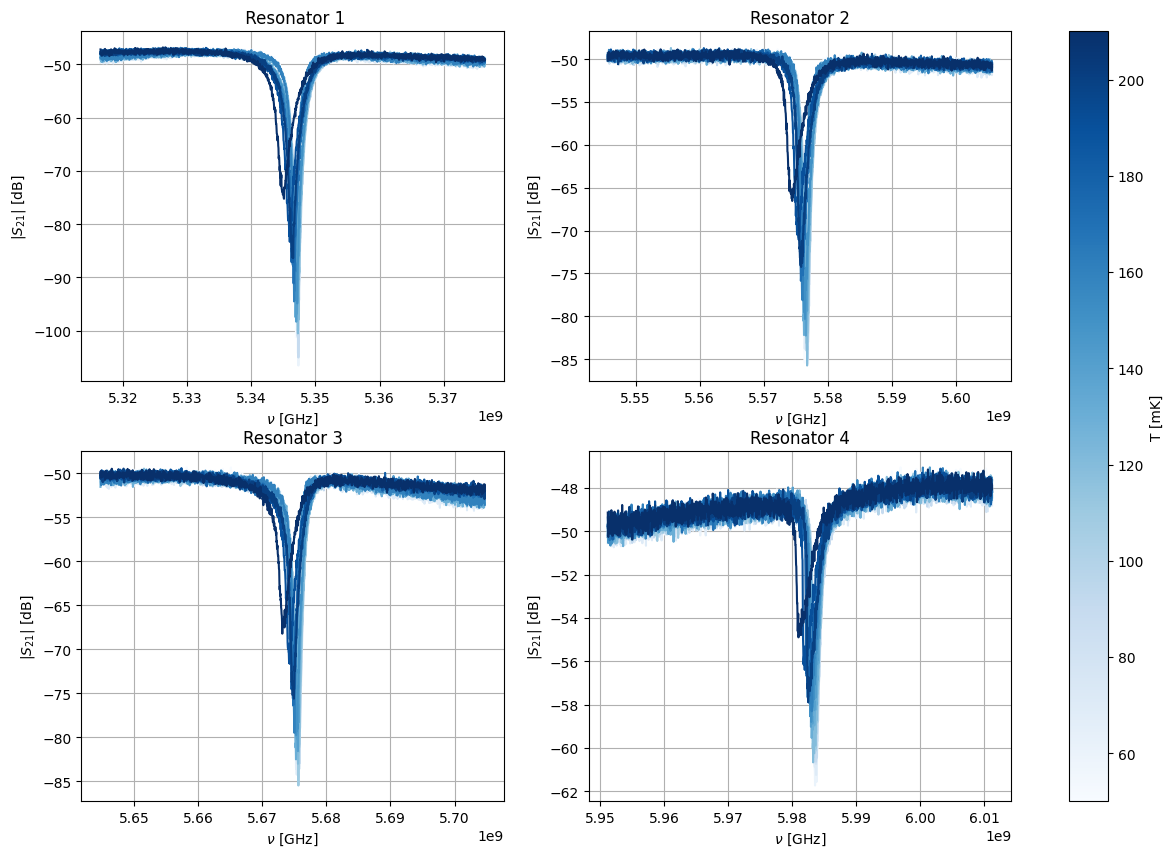

In [360]:
import matplotlib.cm as cm

# 4. Plot the data with a colormap
fig, axs = plt.subplots(2,2, figsize=(15,10))
norm = plt.Normalize(min(sorted_T), max(sorted_T))
cmap = cm.Blues

for i,datas in enumerate(data['res1']):
    color = cmap(norm(sorted_T[i]))
    axs[0][0].plot(sorted_F[i], sorted_S21[i], color=color, label=f'Temp {T[i]:.1f}')
    axs[0][1].plot(sorted_F_2[i], sorted_S21_2[i], color=color, label=f'Temp {T[i]:.1f}')
    axs[1][0].plot(sorted_F_3[i], sorted_S21_3[i], color=color, label=f'Temp {T[i]:.1f}')
    axs[1][1].plot(sorted_F_4[i], sorted_S21_4[i], color=color, label=f'Temp {T[i]:.1f}')
    
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs)
cbar.set_label('T [mK]')

fig.set_facecolor('white')
axs[0][0].grid()
axs[0][0].set_xlabel(r'$ \nu $ [GHz]')
axs[0][0].set_ylabel(r'$|S_{21}|$ [dB]')
axs[0][0].set_title(r' Resonator 1')
axs[0][1].grid()
axs[0][1].set_xlabel(r'$ \nu $ [GHz]')
axs[0][1].set_ylabel(r'$|S_{21}|$ [dB]')
axs[0][1].set_title(r'Resonator 2')
axs[1][0].grid()
axs[1][0].set_xlabel(r'$ \nu $ [GHz]')
axs[1][0].set_ylabel(r'$|S_{21}|$ [dB]')
axs[1][0].set_title(r'Resonator 3')
axs[1][1].grid()
axs[1][1].set_xlabel(r'$ \nu $ [GHz]')
axs[1][1].set_ylabel(r'$|S_{21}|$ [dB]')
axs[1][1].set_title(r'Resonator 4')

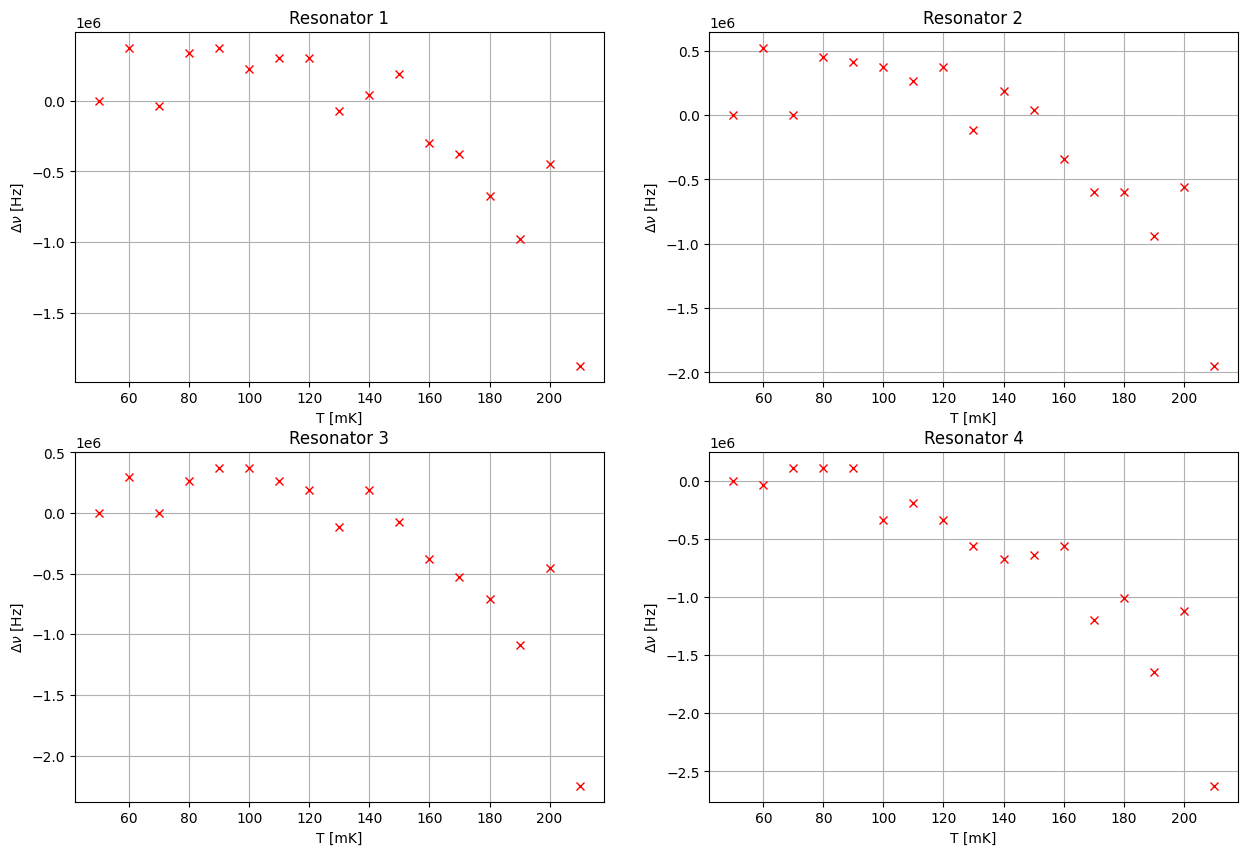

In [361]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
for i,datas in enumerate(data['res1']):
    color = cmap(norm(sorted_T[i]))
    axs[0][0].plot(sorted_T[i],sorted_F[i][np.argmin(sorted_S21[i])]-sorted_F[i][np.argmin(sorted_S21[0])], color='red', marker='x')
    axs[0][1].plot(sorted_T[i],sorted_F_2[i][np.argmin(sorted_S21_2[i])]-sorted_F_2[i][np.argmin(sorted_S21_2[0])], color='red', marker='x')
    axs[1][0].plot(sorted_T[i],sorted_F_3[i][np.argmin(sorted_S21_3[i])]-sorted_F_3[i][np.argmin(sorted_S21_3[0])], color='red', marker='x')
    axs[1][1].plot(sorted_T[i],sorted_F_4[i][np.argmin(sorted_S21_4[i])]-sorted_F_4[i][np.argmin(sorted_S21_4[0])], color='red', marker='x')
axs[0][0].set_xlabel('T [mK]')
axs[0][0].set_ylabel(r'$\Delta\nu$ [Hz]')
axs[0][0].grid()
axs[0][0].set_title('Resonator 1')
axs[0][1].set_xlabel('T [mK]')
axs[0][1].set_ylabel(r'$\Delta\nu$ [Hz]')
axs[0][1].grid()
axs[0][1].set_title('Resonator 2')
axs[1][0].set_xlabel('T [mK]')
axs[1][0].set_ylabel(r'$\Delta\nu$ [Hz]')
axs[1][0].set_title('Resonator 3')
axs[1][0].grid()
axs[1][1].set_xlabel('T [mK]')
axs[1][1].set_ylabel(r'$\Delta\nu$ [Hz]')
axs[1][1].set_title('Resonator 4')
axs[1][1].grid()

Text(0.5, 1.0, 'Resonator 4')

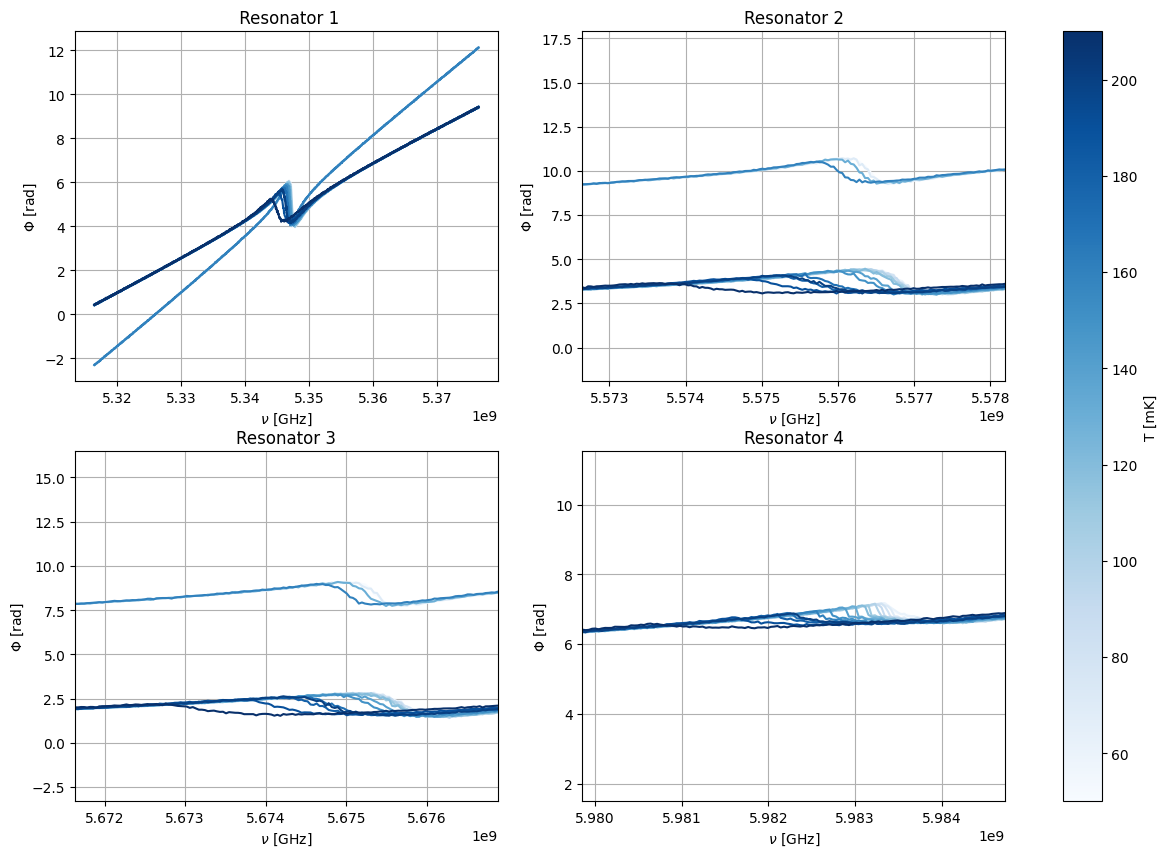

In [362]:
import matplotlib.cm as cm

# 4. Plot the data with a colormap
fig, axs = plt.subplots(2,2, figsize=(15,10))
norm = plt.Normalize(min(sorted_T), max(sorted_T))
cmap = cm.Blues

for i,datas in enumerate(data['res1']):
    color = cmap(norm(sorted_T[i]))
    axs[0][0].plot(sorted_F[i], sorted_Phi[i], color=color, label=f'Temp {T[i]:.1f}')
    axs[0][1].plot(sorted_F_2[i], sorted_Phi_2[i], color=color, label=f'Temp {T[i]:.1f}')
    axs[1][0].plot(sorted_F_3[i], sorted_Phi_3[i], color=color, label=f'Temp {T[i]:.1f}')
    axs[1][1].plot(sorted_F_4[i], sorted_Phi_4[i], color=color, label=f'Temp {T[i]:.1f}')
    
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs)
cbar.set_label('T [mK]')

# Add labels and title
fig.set_facecolor('white')
axs[0][0].grid()
#axs[0][0].set_xlim([sorted_F[0][np.argmin(sorted_S21[0])-100],sorted_F[-1][np.argmin(sorted_S21[-1])+100]])
axs[0][0].set_xlabel(r'$ \nu $ [GHz]')
axs[0][0].set_ylabel(r'$\Phi$ [rad]')
axs[0][0].set_title(r' Resonator 1')
axs[0][1].grid()
axs[0][1].set_xlim([sorted_F_2[0][np.argmin(sorted_S21_2[0])-100],sorted_F_2[-1][np.argmin(sorted_S21_2[-1])+100]])
axs[0][1].set_xlabel(r'$ \nu $ [GHz]')
axs[0][1].set_ylabel(r'$\Phi$ [rad]')
axs[0][1].set_title(r'Resonator 2')
axs[1][0].grid()
axs[1][0].set_xlim([sorted_F_3[0][np.argmin(sorted_S21_3[0])-100],sorted_F_3[-1][np.argmin(sorted_S21_3[-1])+100]])
axs[1][0].set_xlabel(r'$ \nu $ [GHz]')
axs[1][0].set_ylabel(r'$\Phi$ [rad]')
axs[1][0].set_title(r'Resonator 3')
axs[1][1].grid()
axs[1][1].set_xlim([sorted_F_4[0][np.argmin(sorted_S21_4[0])-100],sorted_F_4[-1][np.argmin(sorted_S21_4[-1])+100]])
axs[1][1].set_xlabel(r'$ \nu $ [GHz]')
axs[1][1].set_ylabel(r'$\Phi$ [rad]')
axs[1][1].set_title(r'Resonator 4')

Vediamo cosa acccade nel piano IQ

Text(0.5, 0, '$\\nu$')

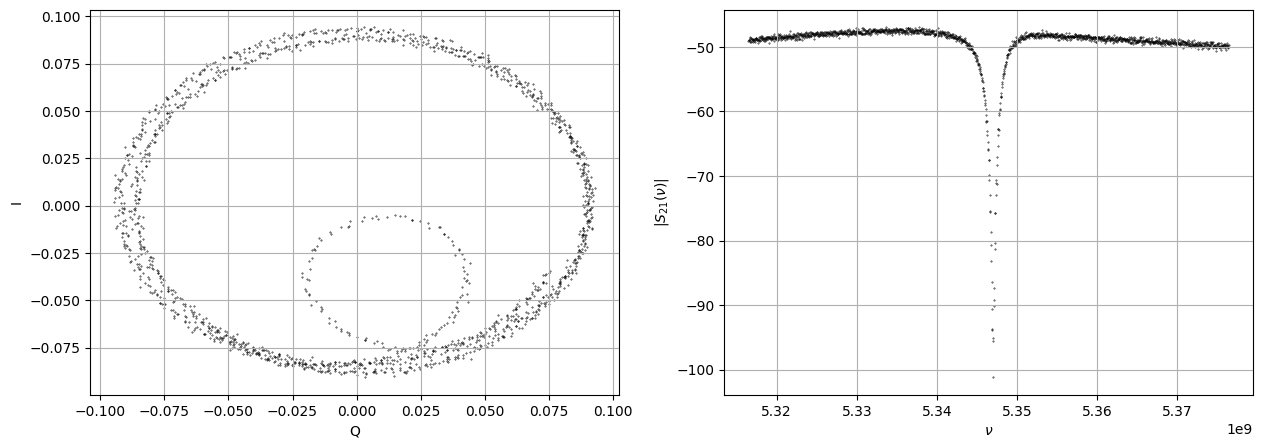

In [363]:
fig, axs  = plt.subplots(1,2, figsize=(15,5))
axs[0].scatter(sorted_Q[0],sorted_I[0], marker='.', s=0.5, color='black', alpha=1)
axs[0].grid()
axs[0].set_ylabel('I')
axs[0].set_xlabel('Q')
axs[1].scatter(sorted_F[0],sorted_S21[0], marker='.', s=0.5, color='black', alpha=1)
axs[1].grid()
axs[1].set_ylabel(r'$|S_{21}(\nu)|$')
axs[1].set_xlabel(r'$\nu$')

Togliamo il cerchiolino interno e vediamo che accade sul grafico di S21

In [364]:
a = sorted_Q[0]
b = sorted_I[0]
filtered_a, filtered_b, idx = [], [],[]
points = zip(a,b)
    
for i,(c,d) in enumerate(points):
    if np.sqrt(c**2 + d**2)<0.075:
        filtered_a.append(c) 
        filtered_b.append(d) 
        idx.append(i)               

In [365]:
x_temp = (sorted_F[0][idx]-sorted_F[0][np.argmin(sorted_S21[0])])/sorted_F[0][np.argmin(sorted_S21[0])]
y_temp = sorted_S21[0][idx]

In [366]:
from scipy.optimize import curve_fit

In [367]:
Q = sorted_F[0][np.argmin(sorted_S21[0])]/1e6
p_temp = [50,4800, 5000, 3.15]

In [368]:
popt, pcov = curve_fit(resonance_model,x_temp, y_temp, p_temp)
chi2s, betas = [], []
beta = np.arange(1,10,0.1)
for b in beta:
    chi2 = 0
    for i in range(len(x_temp)):
        chi2 += ((y_temp[i]-resonance_model(x_temp[i],*popt))/(b*0.23))**2
    #if chi2<1:
    chi2s.append(chi2/(len(x_temp)-4))
    betas.append(b)

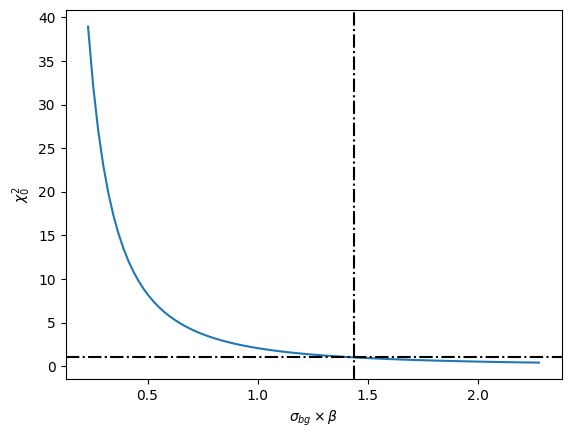

In [369]:
plt.plot(np.array(betas)*0.23,chi2s)
plt.ylabel(r'$\chi_{0}^{2}$')
plt.xlabel(r'$\sigma_{bg} \times \beta$')
plt.axhline(y=1, linestyle='-.', color='black')
plt.axvline(x=1.438, linestyle='-.', color='black')

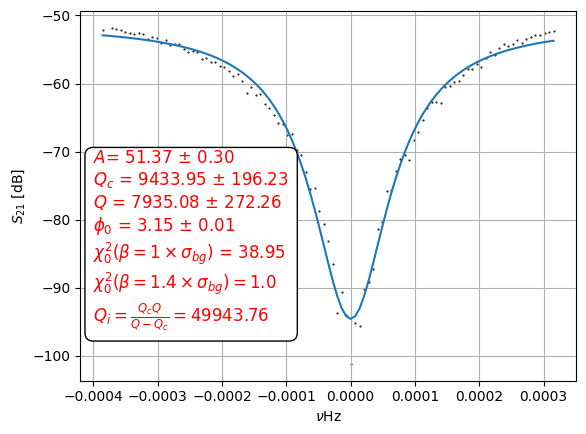

In [370]:
plt.scatter(x_temp, y_temp, marker='.', s=1, color='black', label='Raw data around minimum')
plt.plot(x_temp, resonance_model(x_temp, *popt))
plt.grid()
plt.xlabel(r'$\nu $Hz')
plt.ylabel(r'$ S_{21}$ [dB]')
Q_i = (popt[1]*popt[2])/(popt[2] - popt[1])

box_props = dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white')
text_box_content = (r'$A $= '+f'{popt[0]:.2f}'+r' $\pm$ '+f'{np.sqrt(np.diag(pcov)[0]):.2f}\n' + 
                    r'$Q_{c}$ = '+f'{popt[2]:.2f}'+r' $\pm$ '+f'{np.sqrt(np.diag(pcov)[1]):.2f}\n'+
                    r'$Q$ = '+f'{popt[1]:.2f}'+r' $\pm$ '+f'{np.sqrt(np.diag(pcov)[2]):.2f}\n'+
                    r'$\phi_{0}$ = '+f'{popt[3]:.2f}'+r' $\pm$ '+f'{np.sqrt(np.diag(pcov)[3]):.2f}\n'+
                    r'$\chi^{2}_{0}(\beta=1\times \sigma_{bg})$ = '+ f'{chi2s[0]:.2f}\n'+
                    r'$\chi^{2}_{0}(\beta=1.4 \times \sigma_{bg}) = 1.0$'+'\n'+
                    r'$Q_{i} = \frac{Q_{c}Q}{Q-Q_{c}} = $'+f'{Q_i:.2f}')
text_box = plt.text(-0.0004, -95, text_box_content, fontsize=12, color='red', bbox=box_props)

Facciamo una stima del bg

In [371]:
left  = [i for i in np.where(sorted_F[0]<5.335*1e9)[0]]
right = [i for i in np.where(sorted_F[0]>5.355*1e9)[0]]
f_l = list(sorted_F[0][left])
f_r = list(sorted_F[0][right])
s21_l = list(sorted_S21[0][left])
s21_r = list(sorted_S21[0][right])

In [372]:
x = np.array(f_l + f_r)
y = np.array(s21_l + s21_r)

In [373]:
from scipy.optimize import curve_fit 

In [374]:
def background_3rd(x,a0,a1,a2,a3):
    return a0 + a1*x + a2*(x**2) + a3*(x**3)

def background_2nd(x,a0,a1,a2):
    return a0 + a1*x + a2*(x**2)

In [375]:
p2 = (np.polyfit(x, y, 2))
p3 = (np.polyfit(x, y, 3))
print('p2: ',p2)
print('p3: ',p3)

p2:  [-1.80935725e-15  1.93219213e-05 -5.16318585e+04]
p3:  [ 3.31241736e-23 -5.33165082e-13  2.86052040e-03 -5.11563165e+06]


In [376]:
sigma = np.mean(np.abs(np.polyval(p2,x)-y))
print('sigma background',sigma)

sigma background 0.234213863489574


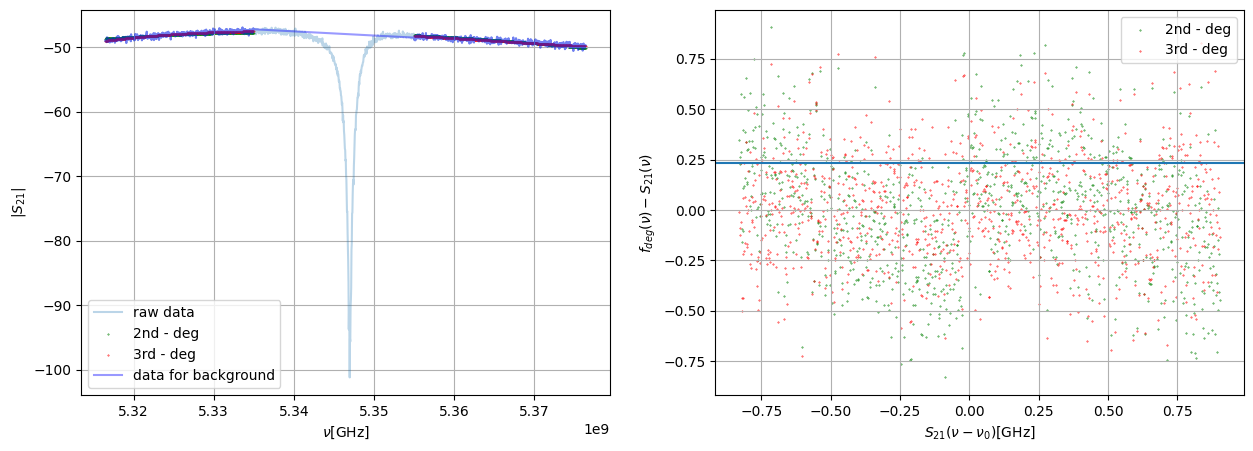

In [377]:
passo = (max((np.polyval(p2,x)-y))-min(np.polyval(p2,x)-y))/len(x)
values = np.arange(min(np.polyval(p2,x)-y),max(np.polyval(p2,x)-y),passo)
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].plot(sorted_F[0],sorted_S21[0], alpha=0.3, label='raw data')
axs[0].scatter(x,np.polyval(p2,x), label='2nd - deg',color='green',marker='.',s=0.5)
axs[0].scatter(x,np.polyval(p3,x), label='3rd - deg',color='red',marker='.',s=0.5)
axs[1].scatter(values,np.polyval(p2,x)-y, label='2nd - deg',color='green',marker='.',s=0.5)
axs[1].scatter(values,np.polyval(p3,x)-y, label='3rd - deg',color='red',marker='.',s=0.5)
axs[1].axhline(sigma)
axs[0].plot(x,y, color='blue', alpha=0.4, label='data for background')
axs[0].grid()
axs[1].grid()
axs[0].set_xlabel(r'$ \nu$[GHz]')
axs[0].set_ylabel(r'$ |S_{21}|$')
axs[1].set_xlabel(r'$ S_{21}(\nu - \nu_{0})$[GHz]')
axs[1].set_ylabel(r'$ f_{deg}(\nu) - S_{21}(\nu)$')
axs[0].legend()
axs[1].legend()


Praticamente fittare il bg con secondo o terzo grado è la stessa cosa...tanto vale avere meno parametri e fittare con secondo grado

Ora dobbiamo fittare la risonanza per trovare i quattro parametri che ci interessano...

In [378]:
def Q_stima(x0,w):
    if (((x0 is None) or (w is None)) or w==0):
        print('Q_stima: None detected!')
        return 0
    else:
        return x0/w
    
def FWHM(x,y):
    x = np.array(x)
    y = np.array(np.power(10,(y/20)))
    half = np.max(y) - (np.max(y)-np.abs(y)) / 2.
    minimums = x[np.where(y < half)]
    return (max(minimums) - min(minimums))

def new_model(x,a,b,c,Q,Qc,phi):
    return b*x+c*x**2+a*(1+(1-(2*Q*np.cos(phi))/(Qc)-(4*Q**2*np.sin(phi)*x)/(Qc))/(1+4*Q**2*x**2))

def resonance(x, Q, Qc,phi0):
    return np.abs(1-Q/Qc*np.exp(1j*phi0)/(1+1j*(2*x*Q)))

def model2(x, a0, a1, a2, Q, Qc, phi0):
    params = np.array([a0,a1,a2])
    pol = np.polyval(params, x)
    res = resonance(x,Q,Qc,phi0)
    return res*pol

In [379]:
f = (sorted_F[0]-sorted_F[0][np.argmin(sorted_S21[0])])/(sorted_F[0][np.argmin(sorted_S21[0])]) 
lsq = LeastSquares(f,sorted_S21[0],sigma*1.44*np.ones_like(sorted_S21[0]),model2)

In [380]:
c_test  = -48
b_test  = 0
a_test  = -0.03
Q_test  = 7000
Qc_test  = 9000
phi_test = 3


p = [a_test,b_test,c_test,Q_test,Qc_test,phi_test]
m = minuit.Minuit(lsq,*p);

In [381]:
m.fixed['Q'] = False
m.fixed['Qc'] = False
#m.fixed['c'] = False
#m.fixto('a0',-48)
#m.limits['Qc'] = (1e3,2e4)
#m.limits['Q'] = (1e3,2e4)

In [382]:
m.migrad();

In [383]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a0,-48.3e3,1.0e3,,,,,
1,a1,-150.7,2.7,,,,,
2,a2,-47.839,0.015,,,,,
3,Q,6.339e3,0.028e3,,,,,
4,Qc,6.841e3,0.022e3,,,,,
5,phi0,3.1208,0.0023,,,,,


In [384]:
chi2_migrad = 0
for i in range(len(f)):
    chi2_migrad += ((sorted_S21[0][i]-model2(sorted_S21[0][i],*p))/(1))**2
chi2_migrad = chi2_migrad/(len(sorted_S21[0])-len(m.params))

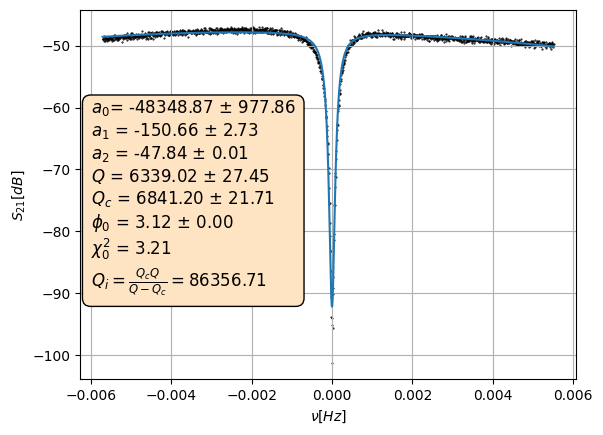

In [385]:
#plt.plot(f,new_model(f,*p), label='Expected')
plt.plot(f,model2(f,*m.values), label='New_model - MIGRAD')
plt.scatter(f,sorted_S21[0],color='black',marker='.',s=1, label='Data')
plt.xlabel(r'$\nu [Hz]$')
plt.ylabel(r'$S_{21} [dB]$')
plt.grid()
Q_i = (m.values[3]*m.values[4])/(m.values[4] - m.values[3])


box_props = dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='bisque')
text_box_content = (r'$a_0$= '+f'{m.values[0]:.2f}'+r' $\pm$ '+f'{m.errors[0]:.2f}\n' + 
                    r'$a_1$ = '+f'{m.values[1]:.2f}'+r' $\pm$ '+f'{m.errors[1]:.2f}\n'+
                    r'$a_2$ = '+f'{m.values[2]:.2f}'+r' $\pm$ '+f'{m.errors[2]:.2f}\n' +
                    r'$Q$ = '+f'{m.values[3]:.2f}'+r' $\pm$ '+f'{m.errors[3]:.2f}\n' +
                    r'$Q_{c}$ = '+f'{m.values[4]:.2f}'+r' $\pm$ '+f'{m.errors[4]:.2f}\n' +
                    r'$\phi_{0}$ = '+f'{m.values[5]:.2f}'+r' $\pm$ '+f'{m.errors[5]:.2f}\n'+
                    r'$\chi^{2}_{0}$ = '+ f'{(m.fval/m.ndof):.2f}\n'+
                    r'$Q_{i} = \frac{Q_{c}Q}{Q-Q_{c}} = $'+f'{(1/m.values[3]-1/m.values[4])**(-1):.2f}')
text_box = plt.text(-0.006, -89, text_box_content, fontsize=12, color='black', bbox=box_props)

In [386]:
def fase(x, Q, Qc,phi0):
    q = (1-Q/Qc*np.exp(1j*phi0)/(1+1j*(2*x*Q))).real
    i = (1-Q/Qc*np.exp(1j*phi0)/(1+1j*(2*x*Q))).imag
    return -np.unwrap(np.arctan(i/q))

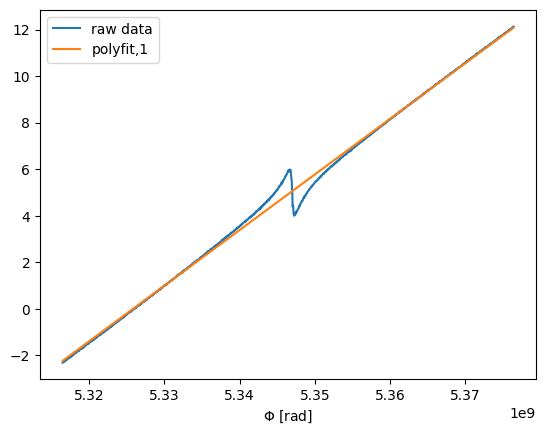

In [387]:
a = np.polyfit(sorted_F[0],sorted_Phi[0],1)
plt.plot(sorted_F[0],sorted_Phi[0],label='raw data')
plt.xlabel(r'$\nu$ [Hz]')
plt.xlabel(r'$\Phi$ [rad]')
plt.plot(sorted_F[0],np.polyval(a,sorted_F[0]),label='polyfit,1')
plt.legend()

In [391]:
dati = sorted_Phi[0] - np.polyval(a,sorted_F[0])

In [392]:
F = (sorted_F[0]-sorted_F[0][np.argmin(sorted_S21[0])])/sorted_F[0][np.argmin(sorted_S21[0])]
F = F[(np.argmin(sorted_S21[0])-50):(np.argmin(sorted_S21[0])+50)]
dati = dati[(np.argmin(sorted_S21[0])-50):(np.argmin(sorted_S21[0])+50)]

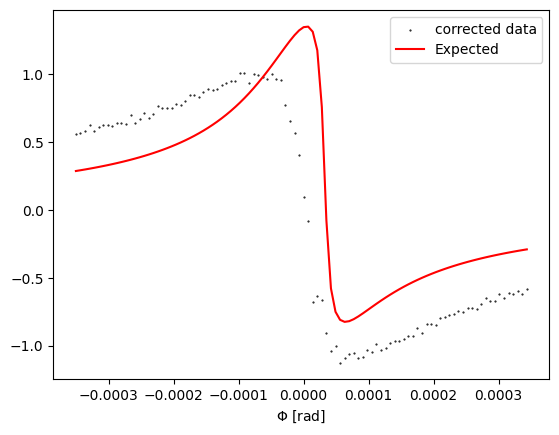

In [395]:
params = [4500,4600, 0.3]
plt.scatter(F,dati,label='corrected data',color='black',marker='.',s=1)
plt.plot(F,fase(F,*params),label='Expected',color='red')
plt.xlabel(r'$\nu$ [Hz]')
plt.xlabel(r'$\Phi$ [rad]')
plt.legend()

In [396]:
lsq = LeastSquares(F,dati,0.01,fase)

In [397]:
m = minuit.Minuit(lsq,*params)

In [398]:
m.migrad();

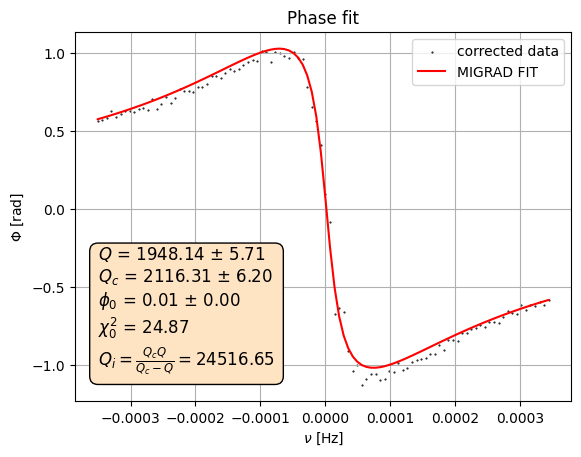

In [408]:
plt.scatter(F,dati,label='corrected data',color='black',marker='.',s=1)
plt.xlabel(r'$\nu$ [Hz]')
plt.ylabel(r'$\Phi$ [rad]')
plt.plot(F,fase(F,*m.values),label='MIGRAD FIT',color='red')
plt.legend()
plt.title('Phase fit')
plt.grid()

box_props = dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='bisque')
text_box_content = (r'$Q$ = '+f'{m.values[0]:.2f}'+r' $\pm$ '+f'{m.errors[0]:.2f}\n' +
                    r'$Q_{c}$ = '+f'{m.values[1]:.2f}'+r' $\pm$ '+f'{m.errors[1]:.2f}\n' +
                    r'$\phi_{0}$ = '+f'{m.values[2]:.2f}'+r' $\pm$ '+f'{m.errors[2]:.2f}\n'+
                    r'$\chi^{2}_{0}$ = '+ f'{(m.fval/m.ndof):.2f}\n'+
                    r'$Q_{i} = \frac{Q_{c}Q}{Q_{c}-Q} = $'+f'{(1/m.values[0]-1/m.values[1])**(-1):.2f}')
text_box = plt.text(-0.00035, -1, text_box_content, fontsize=12, color='black', bbox=box_props)